# 1 导入包

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 2 加载数据

In [2]:

data = pd.read_csv("Auto.csv", index_col=0)
data["HighConsumption"] = np.array(data["mpg"] > data["mpg"].quantile(), dtype=int)
data["origin_2"] = pd.get_dummies(data["origin"])[2]
data["origin_3"] = pd.get_dummies(data["origin"])[3]

x = data[["cylinders", "displacement", "horsepower", "weight", "acceleration", "origin_2", "origin_3"]]
y = data["HighConsumption"]
yy = data["mpg"]
x.head()

,cylinders,displacement,horsepower,weight,acceleration,origin_2,origin_3
1,8,307.0,130,3504,12.0,0,0
2,8,350.0,165,3693,11.5,0,0
3,8,318.0,150,3436,11.0,0,0
4,8,304.0,150,3433,12.0,0,0
5,8,302.0,140,3449,10.5,0,0


# 3 PCA降维

In [3]:
pca = PCA(n_components=1)
pca.fit(x)
x2v = pca.transform(x)

# 4 线性 SVC

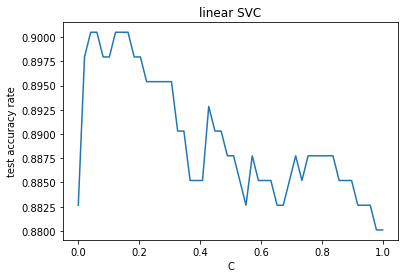

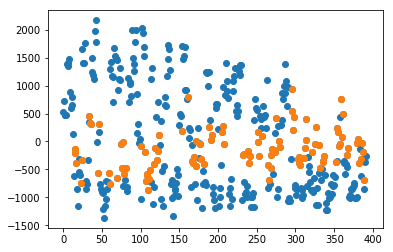

In [4]:
Cs = np.linspace(svm.l1_min_c(x, y), 1, num=50)
param_test = {"C": Cs}
estimator = svm.SVC(kernel="linear")
clf_linear = GridSearchCV(estimator, param_test, cv=5, scoring="accuracy")
clf_linear.fit(x, y)

plt.plot(Cs, clf_linear.cv_results_["mean_test_score"])
plt.xlabel("C")
plt.ylabel("test accuracy rate")
plt.title("linear SVC")
plt.show()


sups_linear = pca.transform(clf_linear.best_estimator_.support_vectors_)
plt.scatter(np.arange(len(x2v)), x2v)
plt.scatter(clf_linear.best_estimator_.support_, sups_linear)
plt.show()

# 5  SVC

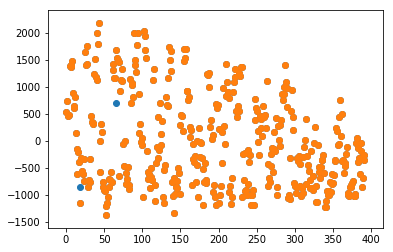

In [5]:
Cs = np.linspace(10, 100, num=50)
param_test_rbf = {"C": Cs, "gamma": [float(i) / x.shape[1] for i in range(1, 8)]}
estimator = svm.SVC(kernel="rbf")
clf_rbf = GridSearchCV(estimator, param_test_rbf, cv=5, scoring="accuracy")
clf_rbf.fit(x, y)

sups_rbf = pca.transform(clf_rbf.best_estimator_.support_vectors_)
plt.scatter(np.arange(len(x2v)), x2v)
plt.scatter(clf_rbf.best_estimator_.support_, sups_rbf)
plt.show()

# 6 SVR

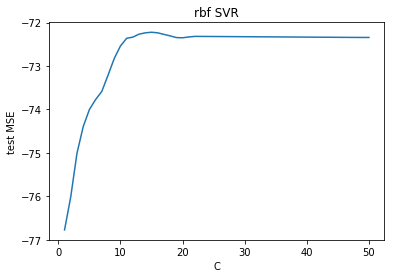

In [6]:
Cs = np.linspace(1, 50, num=50)
param_test = {"C": Cs}
estimator = svm.SVR(kernel="rbf")
reg_rbf = GridSearchCV(estimator, param_test, cv=5, scoring="neg_mean_squared_error")
reg_rbf.fit(x, yy)

plt.plot(Cs, reg_rbf.cv_results_["mean_test_score"])
plt.xlabel("C")
plt.ylabel("test MSE")
plt.title("rbf SVR")
plt.show()

# 7 RVC

In [11]:
from skrvm import RVC

In [12]:
clf = RVC()
clf.fit(x, y)
rels_rvc = clf.relevance_
print("relevance数量为:%s" % rels_rvc.shape[0])

relevance数量为:385
